In [110]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [111]:
# Δεδομένα
stackoverflow_data = pd.read_csv('sx-stackoverflow.txt', sep="\s+", header = None, names=["source_id", "target_id", "timestamp"])

stackoverflow_data.head(5)

,source_id,target_id,timestamp
0,9,8,1217567877
1,1,1,1217573801
2,13,1,1217606247
3,17,1,1217617639
4,48,2,1217618182


In [157]:
# Create a small dataset of 100 rows first 50 and last 50
# dataset = pd.concat([stackoverflow_data.iloc[:1000], stackoverflow_data.iloc[-1000:]]) 
dataset = stackoverflow_data.iloc[:1000]

In [158]:
# Υπολογισμός των χρονικών στιγμών t_min, t_max, ΔΤ, δτ
N = int(input('Enter number of time periods:')) # User Input

t_min = dataset.timestamp.min()
t_max = dataset.timestamp.max()

DT = t_max - t_min
dt = DT / N

periodLength = int(len(dataset)/N)

print('Minimum Timestamp = ', t_min, 'Date: ', pd.to_datetime(t_min, unit='s'))
print('Maximum Timestamp = ', t_max, 'Date: ', pd.to_datetime(t_max, unit='s'))
print('DT = ', DT)
print('χρονική διάρκεια: ', dt)


Enter number of time periods:5
Minimum Timestamp =  1217567877 Date:  2008-08-01 05:17:57
Maximum Timestamp =  1218036494 Date:  2008-08-06 15:28:14
DT =  468617
χρονική διάρκεια:  93723.4


In [159]:
# Διαμέριση του συνολικού χρονικού διαστήματος
def create_intervals(dataset,N):
    
    intervals = []
    for j in range(0,N):
        
        #Start of time interval
        tj = t_min + j * dt
        
        #End of time interval
        tj1 = t_min + (j+1) * dt

        intervals.append([int(tj),int(tj1)])

    return(intervals)

time_intervals = create_intervals(dataset,N)
# print('Time Intervals: ', time_intervals)

In [160]:
def graph(time_interval):
    min_time, max_time = time_interval
    g = nx.DiGraph()
    df_indexes=[]
    index=0
    while index < len(dataset):
        if min_time <= dataset.timestamp[index] < max_time \
            or ( ( max_time == N-1 and min_time <= dataset.timestamp[index] <= max_time)) \
            and dataset.source_id[index] != dataset.target_id[index]:
            g.add_edge(dataset.source_id[index], dataset.target_id[index])
            df_indexes.append(index) 
        index += 1
    nx.draw_networkx(g, node_size=150, font_size=10)
    plt.show()
    centrality_plots(g)
    # print(dataset.iloc[df_indexes])


In [232]:
def centrality_plots(G):
    
    # Compute the degree centrality:
    degree_centrality = nx.degree_centrality(G)
    # Compute the in degree centrality:
    in_degree_centrality = nx.in_degree_centrality(G)
    # Compute the Out Degree Centrality:
    out_degree_centrality = nx.out_degree_centrality(G)
    # Compute the closeness Centrality: 
    closeness_centrality = nx.closeness_centrality(G)
    # Compute the Betweenness Centrality: 
    betweenness_centrality = nx.betweenness_centrality(G)
    # Compute the Eigenvector Centrality: 
    eigenvector_centrality = nx.eigenvector_centrality_numpy(G)
    # Compute the Katz Centrality: 
    katz_centrality = nx.katz_centrality_numpy(G)
    
    
    # degrees = [len(list(G.neighbors(n))) for n in G.nodes()]

    # Plots 
    fig, axs = plt.subplots(3, 3, figsize=(15,15))

    # Plot a histogram of the degree centrality distribution of the graph.
    degree_centrality_values = np.asarray(list(degree_centrality.values())) 
    axs[0][0].set_ylabel('Relative Frequency')
    axs[0][0].set_title('degree centrality')
    axs[0][0].hist(degree_centrality_values)
    
    # Plot a histogram of the in degree centrality distribution of the graph.
    in_degree_centrality_values = np.asarray(list(in_degree_centrality.values())) 
    axs[0][1].set_title('in degree centrality')
    axs[0][1].hist(in_degree_centrality_values)
    
    # Plot a histogram of the out degree centrality distribution of the graph.
    out_degree_centrality_values = np.asarray(list(out_degree_centrality.values())) 
    axs[0][2].set_title('out degree centrality')
    axs[0][2].hist(out_degree_centrality_values)
    
    # Plot a histogram of the closeness Centrality distribution of the graph
    closeness_centrality_values = np.asarray(list(closeness_centrality.values())) 
    axs[1][0].set_title('Closeness Centrality')
    axs[1][0].hist(closeness_centrality_values)

    # Plot a histogram of the Betweenness Centrality distribution of the graph
    betweenness_centrality_values = np.asarray(list(betweenness_centrality.values())) 
    axs[1][1].set_title('Betweenness Centrality')
    axs[1][1].hist(betweenness_centrality_values)

    # Plot a histogram of the Eigenvector Centrality distribution of the graph
    eigenvector_centrality_value = np.asarray(list(eigenvector_centrality.values())) 
    axs[1][2].set_title('Eigenvector Centrality')
    axs[1][2].hist(eigenvector_centrality_value)

    # Plot a histogram of the Katz Centrality distribution of the graph
    katz_centrality_values = np.asarray(list(katz_centrality.values())) 
    axs[2][0].set_title('Katz Centrality')
    axs[2][0].hist(katz_centrality_values)
    
    plt.show()

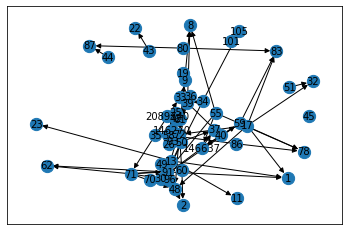

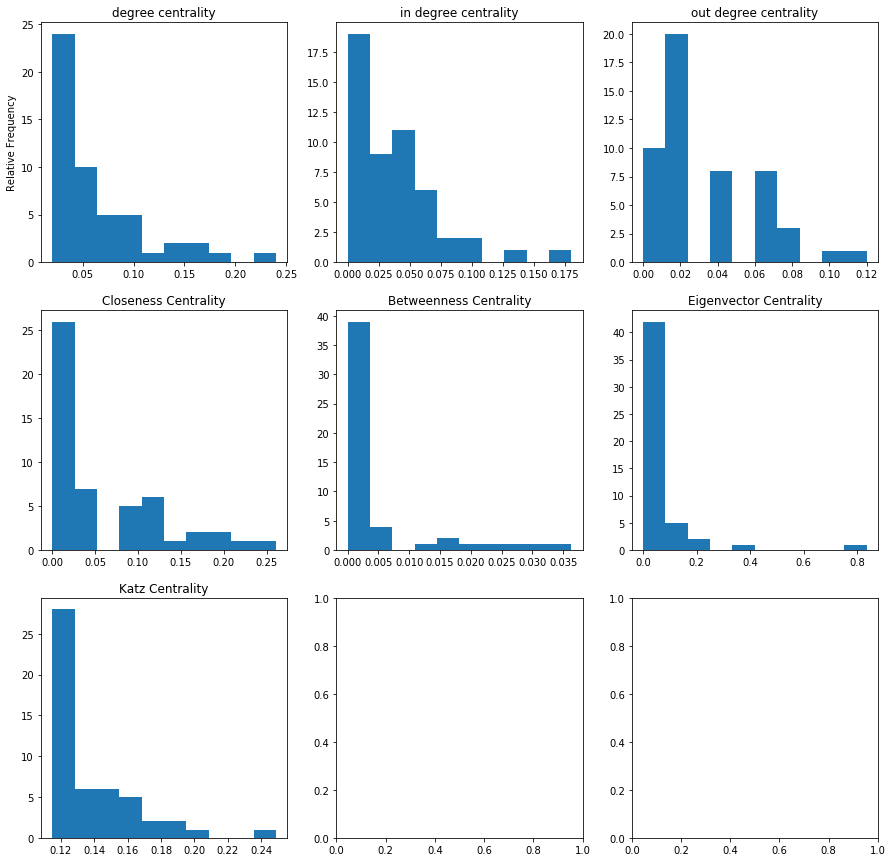

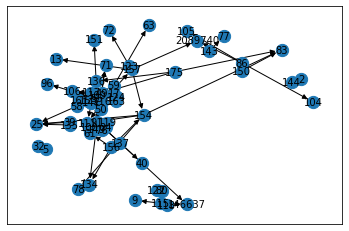

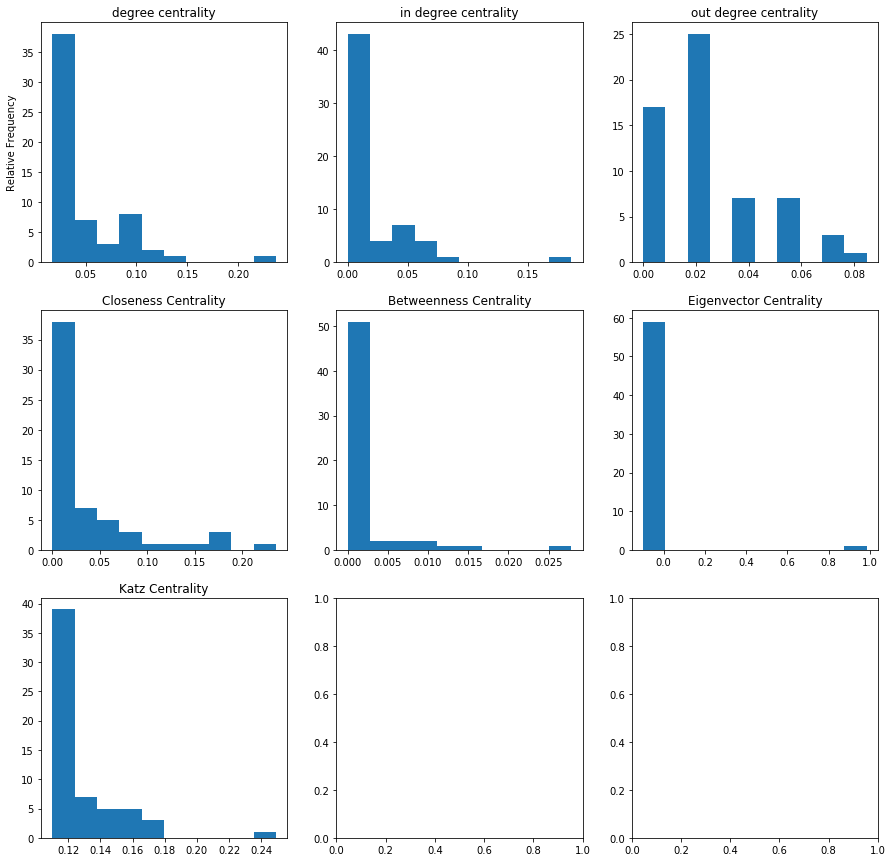

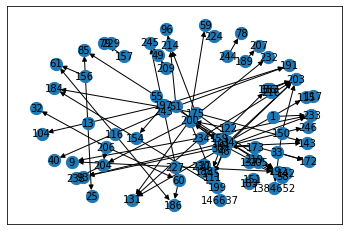

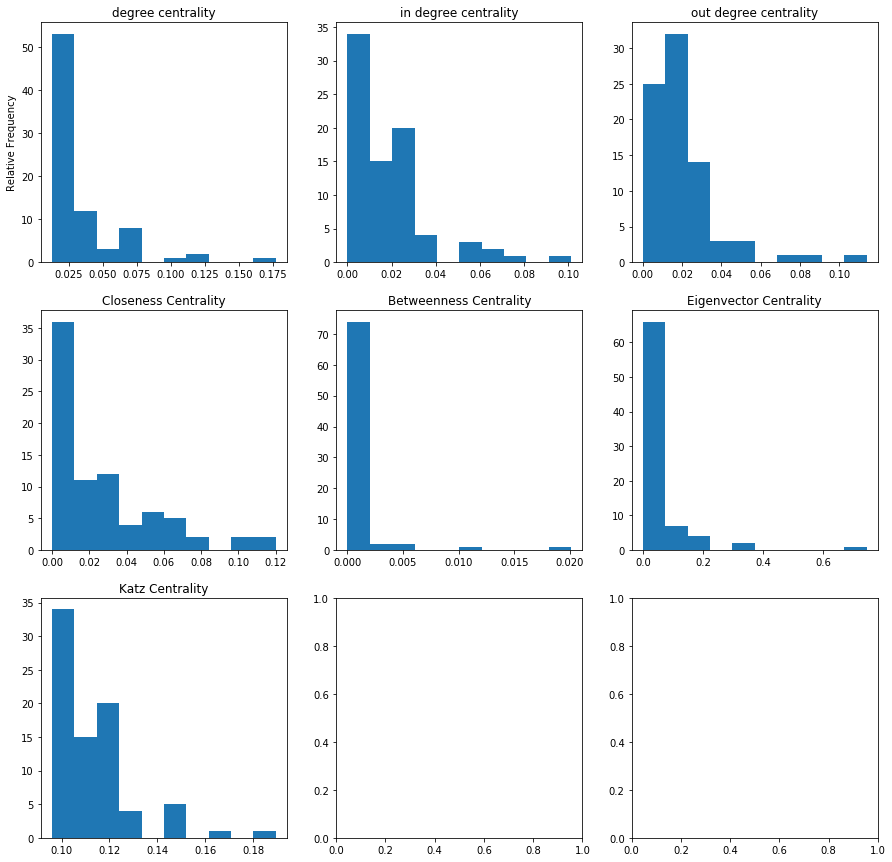

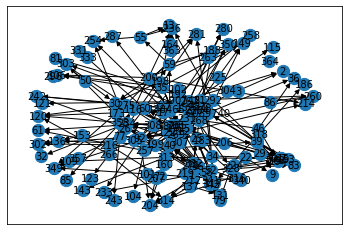

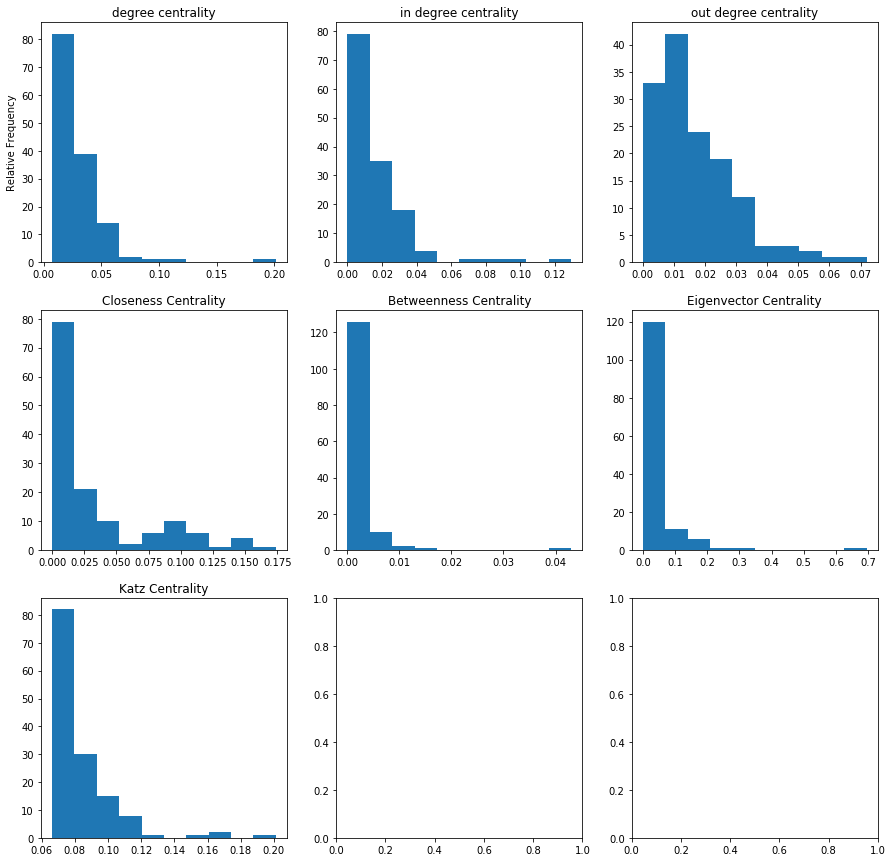

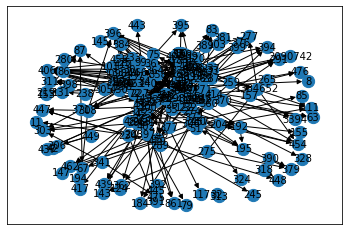

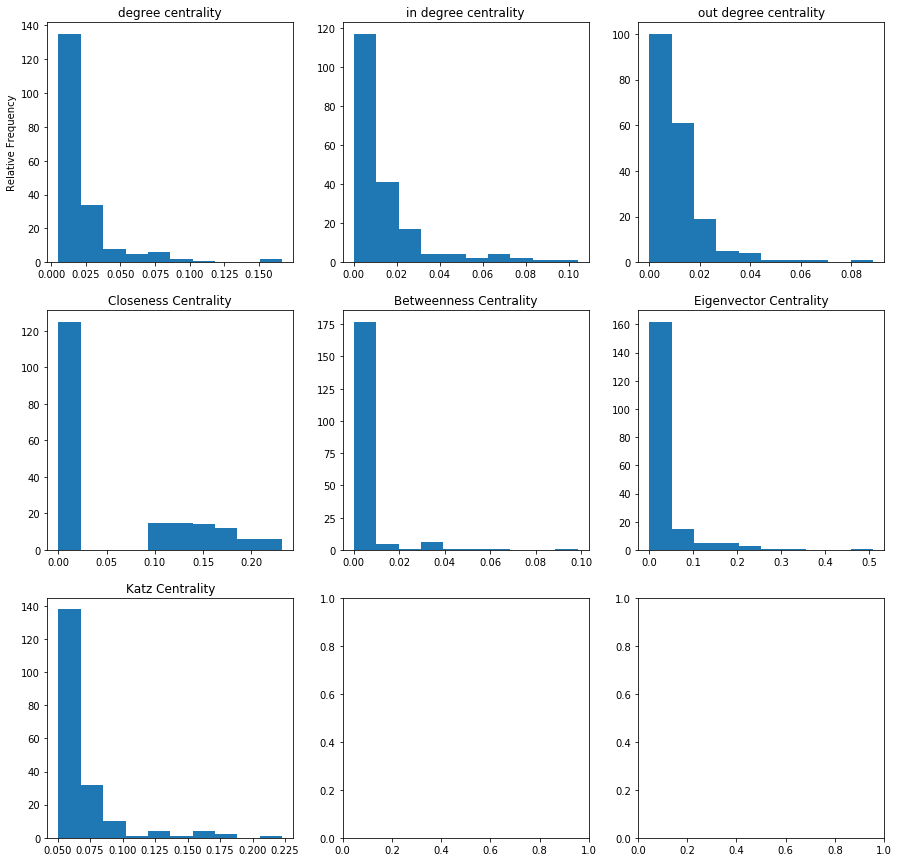

In [233]:
for i in range(N):
    graph(time_intervals[i])

In [269]:
def salam(): # Finds V* and E*
    t=0
    while t < N - 1:
        g1 = nx.DiGraph()
        g2 = nx.DiGraph()
        for index in range(len(dataset)):
            if time_intervals[t][0] <= dataset.timestamp[index] < time_intervals[t][1] \
                and dataset.source_id[index] != dataset.target_id[index]:
                    g1.add_edge(dataset.source_id[index], dataset.target_id[index])
            elif time_intervals[t + 1][0] <= dataset.timestamp[index] < time_intervals[t + 1][1] \
                and dataset.source_id[index] != dataset.target_id[index]:
                    g2.add_edge(dataset.source_id[index], dataset.target_id[index])
        v = []
        e1 = []
        e2 = []
        
        for i in g1.nodes: 
            for j in g2.nodes:
                if i == j:
                    print(i,j)
                    v.append(i)
                    break
                    
        for i in g1.edges:
            found1 = False
            found2 = False
            for j in v:
                if i[0] == j:
                    found1 = True
                elif i[1] == j:
                    found2 = True
            if found1 and found2:
                e1.append(i)
                
        for i in g2.edges:
            found1 = False
            found2 = False
            for j in v:
                if i[0] == j:
                    found1 = True
                elif i[1] == j:
                    found2 = True
            if found1 and found2:
                e2.append(i)
                
            print('t =', t)
            print('V*[t_', t, ',', 't_', t + 2, '} = ', v)
            print('E*[t_', t, ',', 't_', t + 1, '] =', e1)
            print('E*[t_', t + 1, ',', 't_', t + 2, '] =', e2)
        t += 1
        
 

In [270]:
salam()
    

9 9
13 13
17 17
2 2
39 39
32 32
40 40
49 49
50 50
55 55
61 61
58 58
25 25
59 59
2089740 2089740
72 72
34 34
78 78
71 71
86 86
146637 146637
80 80
83 83
91 91
96 96
105 105
t = 0
V*[t_ 0 , t_ 2 } =  [9, 13, 17, 2, 39, 32, 40, 49, 50, 55, 61, 58, 25, 59, 2089740, 72, 34, 78, 71, 86, 146637, 80, 83, 91, 96, 105]
E*[t_ 0 , t_ 1 ] = [(9, 72), (17, 32), (17, 72), (17, 83), (39, 40), (39, 91), (40, 59), (40, 146637), (49, 13), (50, 2089740), (50, 91), (55, 78), (55, 146637), (55, 91), (61, 58), (61, 39), (58, 72), (25, 61), (59, 78), (59, 83), (2089740, 61), (72, 9), (72, 58), (34, 39), (34, 91), (34, 105), (71, 91), (86, 58), (86, 78), (146637, 59), (80, 83), (96, 91)]
E*[t_ 1 , t_ 2 ] = [(40, 146637)]
t = 0
V*[t_ 0 , t_ 2 } =  [9, 13, 17, 2, 39, 32, 40, 49, 50, 55, 61, 58, 25, 59, 2089740, 72, 34, 78, 71, 86, 146637, 80, 83, 91, 96, 105]
E*[t_ 0 , t_ 1 ] = [(9, 72), (17, 32), (17, 72), (17, 83), (39, 40), (39, 91), (40, 59), (40, 146637), (49, 13), (50, 2089740), (50, 91), (55, 78), (55, 14

40 40
146637 146637
96 96
91 91
49 49
55 55
58 58
59 59
61 61
111 111
32 32
116 116
115 115
9 9
117 117
122 122
136 136
25 25
137 137
143 143
150 150
153 153
151 151
154 154
156 156
104 104
157 157
13 13
78 78
34 34
175 175
t = 1
V*[t_ 1 , t_ 3 } =  [40, 146637, 96, 91, 49, 55, 58, 59, 61, 111, 32, 116, 115, 9, 117, 122, 136, 25, 137, 143, 150, 153, 151, 154, 156, 104, 157, 13, 78, 34, 175]
E*[t_ 1 , t_ 2 ] = [(40, 146637), (40, 91), (49, 91), (58, 59), (58, 25), (59, 61), (59, 111), (61, 111), (111, 91), (116, 61), (116, 157), (116, 91), (115, 9), (115, 146637), (122, 115), (136, 49), (136, 91), (136, 151), (137, 91), (137, 40), (154, 111), (154, 78), (154, 25), (156, 61), (156, 154), (157, 13), (157, 154), (34, 91), (175, 49), (175, 136)]
E*[t_ 2 , t_ 3 ] = [(156, 61)]
t = 1
V*[t_ 1 , t_ 3 } =  [40, 146637, 96, 91, 49, 55, 58, 59, 61, 111, 32, 116, 115, 9, 117, 122, 136, 25, 137, 143, 150, 153, 151, 154, 156, 104, 157, 13, 78, 34, 175]
E*[t_ 1 , t_ 2 ] = [(40, 146637), (40, 91), (49,

t = 1
V*[t_ 1 , t_ 3 } =  [40, 146637, 96, 91, 49, 55, 58, 59, 61, 111, 32, 116, 115, 9, 117, 122, 136, 25, 137, 143, 150, 153, 151, 154, 156, 104, 157, 13, 78, 34, 175]
E*[t_ 1 , t_ 2 ] = [(40, 146637), (40, 91), (49, 91), (58, 59), (58, 25), (59, 61), (59, 111), (61, 111), (111, 91), (116, 61), (116, 157), (116, 91), (115, 9), (115, 146637), (122, 115), (136, 49), (136, 91), (136, 151), (137, 91), (137, 40), (154, 111), (154, 78), (154, 25), (156, 61), (156, 154), (157, 13), (157, 154), (34, 91), (175, 49), (175, 136)]
E*[t_ 2 , t_ 3 ] = [(156, 61), (13, 25), (122, 136), (91, 143), (91, 111), (91, 58), (117, 115), (34, 115), (34, 111), (34, 58)]
t = 1
V*[t_ 1 , t_ 3 } =  [40, 146637, 96, 91, 49, 55, 58, 59, 61, 111, 32, 116, 115, 9, 117, 122, 136, 25, 137, 143, 150, 153, 151, 154, 156, 104, 157, 13, 78, 34, 175]
E*[t_ 1 , t_ 2 ] = [(40, 146637), (40, 91), (49, 91), (58, 59), (58, 25), (59, 61), (59, 111), (61, 111), (111, 91), (116, 61), (116, 157), (116, 91), (115, 9), (115, 146637)

E*[t_ 2 , t_ 3 ] = [(13, 25), (13, 85), (173, 172), (173, 91), (122, 136), (122, 200), (91, 143), (91, 233), (91, 93), (91, 58), (91, 131), (91, 200), (117, 115), (51, 40), (51, 91), (51, 214), (200, 59), (200, 204), (200, 101), (200, 131), (200, 34), (34, 115), (34, 192), (34, 93), (34, 58), (206, 32), (206, 204), (206, 60), (30, 91), (46, 91), (216, 136), (205, 192), (58, 192), (219, 192), (214, 96), (157, 79), (227, 192), (227, 9), (234, 9), (234, 233), (234, 131), (101, 91), (60, 186), (243, 60), (243, 245), (137, 58), (55, 34), (55, 85), (116, 61), (116, 186), (1, 233)]
E*[t_ 3 , t_ 4 ] = [(1, 233)]
t = 2
V*[t_ 2 , t_ 4 } =  [61, 13, 25, 173, 172, 183, 122, 136, 188, 91, 143, 104, 117, 115, 199, 51, 40, 200, 59, 34, 206, 32, 30, 204, 46, 27, 216, 205, 192, 58, 219, 214, 96, 157, 79, 1384652, 207, 227, 9, 230, 234, 233, 101, 60, 186, 93, 153, 131, 243, 137, 55, 116, 245, 1, 85]
E*[t_ 2 , t_ 3 ] = [(13, 25), (13, 85), (173, 172), (173, 91), (122, 136), (122, 200), (91, 143), (91, 23

E*[t_ 3 , t_ 4 ] = [(1, 233), (93, 245), (91, 93), (91, 200), (91, 60), (116, 85), (116, 91), (116, 30), (46, 9), (55, 13), (227, 233), (227, 91), (234, 117), (234, 32), (122, 93), (122, 117), (40, 91), (40, 58)]
t = 2
V*[t_ 2 , t_ 4 } =  [61, 13, 25, 173, 172, 183, 122, 136, 188, 91, 143, 104, 117, 115, 199, 51, 40, 200, 59, 34, 206, 32, 30, 204, 46, 27, 216, 205, 192, 58, 219, 214, 96, 157, 79, 1384652, 207, 227, 9, 230, 234, 233, 101, 60, 186, 93, 153, 131, 243, 137, 55, 116, 245, 1, 85]
E*[t_ 2 , t_ 3 ] = [(13, 25), (13, 85), (173, 172), (173, 91), (122, 136), (122, 200), (91, 143), (91, 233), (91, 93), (91, 58), (91, 131), (91, 200), (117, 115), (51, 40), (51, 91), (51, 214), (200, 59), (200, 204), (200, 101), (200, 131), (200, 34), (34, 115), (34, 192), (34, 93), (34, 58), (206, 32), (206, 204), (206, 60), (30, 91), (46, 91), (216, 136), (205, 192), (58, 192), (219, 192), (214, 96), (157, 79), (227, 192), (227, 9), (234, 9), (234, 233), (234, 131), (101, 91), (60, 186), (243, 60)

t = 2
V*[t_ 2 , t_ 4 } =  [61, 13, 25, 173, 172, 183, 122, 136, 188, 91, 143, 104, 117, 115, 199, 51, 40, 200, 59, 34, 206, 32, 30, 204, 46, 27, 216, 205, 192, 58, 219, 214, 96, 157, 79, 1384652, 207, 227, 9, 230, 234, 233, 101, 60, 186, 93, 153, 131, 243, 137, 55, 116, 245, 1, 85]
E*[t_ 2 , t_ 3 ] = [(13, 25), (13, 85), (173, 172), (173, 91), (122, 136), (122, 200), (91, 143), (91, 233), (91, 93), (91, 58), (91, 131), (91, 200), (117, 115), (51, 40), (51, 91), (51, 214), (200, 59), (200, 204), (200, 101), (200, 131), (200, 34), (34, 115), (34, 192), (34, 93), (34, 58), (206, 32), (206, 204), (206, 60), (30, 91), (46, 91), (216, 136), (205, 192), (58, 192), (219, 192), (214, 96), (157, 79), (227, 192), (227, 9), (234, 9), (234, 233), (234, 131), (101, 91), (60, 186), (243, 60), (243, 245), (137, 58), (55, 34), (55, 85), (116, 61), (116, 186), (1, 233)]
E*[t_ 3 , t_ 4 ] = [(1, 233), (93, 245), (91, 93), (91, 200), (91, 60), (116, 85), (116, 91), (116, 30), (46, 9), (55, 13), (227, 233),

V*[t_ 2 , t_ 4 } =  [61, 13, 25, 173, 172, 183, 122, 136, 188, 91, 143, 104, 117, 115, 199, 51, 40, 200, 59, 34, 206, 32, 30, 204, 46, 27, 216, 205, 192, 58, 219, 214, 96, 157, 79, 1384652, 207, 227, 9, 230, 234, 233, 101, 60, 186, 93, 153, 131, 243, 137, 55, 116, 245, 1, 85]
E*[t_ 2 , t_ 3 ] = [(13, 25), (13, 85), (173, 172), (173, 91), (122, 136), (122, 200), (91, 143), (91, 233), (91, 93), (91, 58), (91, 131), (91, 200), (117, 115), (51, 40), (51, 91), (51, 214), (200, 59), (200, 204), (200, 101), (200, 131), (200, 34), (34, 115), (34, 192), (34, 93), (34, 58), (206, 32), (206, 204), (206, 60), (30, 91), (46, 91), (216, 136), (205, 192), (58, 192), (219, 192), (214, 96), (157, 79), (227, 192), (227, 9), (234, 9), (234, 233), (234, 131), (101, 91), (60, 186), (243, 60), (243, 245), (137, 58), (55, 34), (55, 85), (116, 61), (116, 186), (1, 233)]
E*[t_ 3 , t_ 4 ] = [(1, 233), (93, 245), (91, 93), (91, 200), (91, 60), (116, 85), (116, 91), (116, 30), (46, 9), (55, 13), (227, 233), (227,

227 227
234 234
85 85
122 122
67 67
2090742 2090742
86 86
51 51
39 39
40 40
267 267
200 200
188 188
120 120
275 275
266 266
280 280
206 206
34 34
25 25
192 192
48 48
149 149
230 230
30 30
194 194
35 35
121 121
216 216
312 312
2089740 2089740
83 83
313 313
17 17
199 199
136 136
269 269
26 26
225 225
58 58
71 71
1384652 1384652
287 287
45 45
307 307
106 106
304 304
198 198
296 296
305 305
92 92
143 143
332 332
153 153
117 117
341 341
131 131
271 271
318 318
224 224
328 328
204 204
27 27
72 72
308 308
340 340
316 316
350 350
101 101
303 303
137 137
219 219
32 32
157 157
357 357
358 358
36 36
50 50
363 363
5 5
79 79
342 342
t = 3
V*[t_ 3 , t_ 5 } =  [233, 245, 91, 77, 116, 87, 46, 55, 227, 234, 85, 122, 67, 2090742, 86, 51, 39, 40, 267, 200, 188, 120, 275, 266, 280, 206, 34, 25, 192, 48, 149, 230, 30, 194, 35, 121, 216, 312, 2089740, 83, 313, 17, 199, 136, 269, 26, 225, 58, 71, 1384652, 287, 45, 307, 106, 304, 198, 296, 305, 92, 143, 332, 153, 117, 341, 131, 271, 318, 224, 328, 204, 27, 72

V*[t_ 3 , t_ 5 } =  [233, 245, 91, 77, 116, 87, 46, 55, 227, 234, 85, 122, 67, 2090742, 86, 51, 39, 40, 267, 200, 188, 120, 275, 266, 280, 206, 34, 25, 192, 48, 149, 230, 30, 194, 35, 121, 216, 312, 2089740, 83, 313, 17, 199, 136, 269, 26, 225, 58, 71, 1384652, 287, 45, 307, 106, 304, 198, 296, 305, 92, 143, 332, 153, 117, 341, 131, 271, 318, 224, 328, 204, 27, 72, 308, 340, 316, 350, 101, 303, 137, 219, 32, 157, 357, 358, 36, 50, 363, 5, 79, 342]
E*[t_ 3 , t_ 4 ] = [(91, 120), (91, 200), (91, 312), (91, 83), (91, 340), (91, 350), (116, 87), (116, 85), (116, 91), (116, 30), (46, 194), (46, 36), (227, 233), (227, 91), (234, 87), (234, 117), (234, 32), (122, 117), (122, 72), (67, 83), (2090742, 188), (51, 67), (39, 2089740), (39, 83), (40, 91), (40, 26), (40, 58), (267, 91), (267, 188), (267, 280), (267, 25), (267, 192), (267, 121), (267, 2089740), (267, 83), (200, 188), (200, 106), (188, 280), (275, 120), (275, 230), (266, 120), (206, 91), (206, 87), (206, 83), (34, 25), (34, 230), (25,

V*[t_ 3 , t_ 5 } =  [233, 245, 91, 77, 116, 87, 46, 55, 227, 234, 85, 122, 67, 2090742, 86, 51, 39, 40, 267, 200, 188, 120, 275, 266, 280, 206, 34, 25, 192, 48, 149, 230, 30, 194, 35, 121, 216, 312, 2089740, 83, 313, 17, 199, 136, 269, 26, 225, 58, 71, 1384652, 287, 45, 307, 106, 304, 198, 296, 305, 92, 143, 332, 153, 117, 341, 131, 271, 318, 224, 328, 204, 27, 72, 308, 340, 316, 350, 101, 303, 137, 219, 32, 157, 357, 358, 36, 50, 363, 5, 79, 342]
E*[t_ 3 , t_ 4 ] = [(91, 120), (91, 200), (91, 312), (91, 83), (91, 340), (91, 350), (116, 87), (116, 85), (116, 91), (116, 30), (46, 194), (46, 36), (227, 233), (227, 91), (234, 87), (234, 117), (234, 32), (122, 117), (122, 72), (67, 83), (2090742, 188), (51, 67), (39, 2089740), (39, 83), (40, 91), (40, 26), (40, 58), (267, 91), (267, 188), (267, 280), (267, 25), (267, 192), (267, 121), (267, 2089740), (267, 83), (200, 188), (200, 106), (188, 280), (275, 120), (275, 230), (266, 120), (206, 91), (206, 87), (206, 83), (34, 25), (34, 230), (25,

E*[t_ 3 , t_ 4 ] = [(91, 120), (91, 200), (91, 312), (91, 83), (91, 340), (91, 350), (116, 87), (116, 85), (116, 91), (116, 30), (46, 194), (46, 36), (227, 233), (227, 91), (234, 87), (234, 117), (234, 32), (122, 117), (122, 72), (67, 83), (2090742, 188), (51, 67), (39, 2089740), (39, 83), (40, 91), (40, 26), (40, 58), (267, 91), (267, 188), (267, 280), (267, 25), (267, 192), (267, 121), (267, 2089740), (267, 83), (200, 188), (200, 106), (188, 280), (275, 120), (275, 230), (266, 120), (206, 91), (206, 87), (206, 83), (34, 25), (34, 230), (25, 192), (25, 117), (192, 106), (192, 328), (48, 117), (230, 72), (230, 350), (30, 230), (194, 83), (35, 91), (35, 312), (35, 149), (35, 106), (216, 72), (216, 116), (312, 91), (2089740, 92), (2089740, 149), (2089740, 117), (2089740, 40), (2089740, 36), (2089740, 116), (313, 143), (313, 230), (17, 30), (17, 2089740), (17, 91), (199, 2089740), (199, 136), (199, 117), (199, 91), (269, 58), (269, 25), (269, 92), (26, 71), (26, 91), (225, 149), (225, 230

E*[t_ 3 , t_ 4 ] = [(91, 120), (91, 200), (91, 312), (91, 83), (91, 340), (91, 350), (116, 87), (116, 85), (116, 91), (116, 30), (46, 194), (46, 36), (227, 233), (227, 91), (234, 87), (234, 117), (234, 32), (122, 117), (122, 72), (67, 83), (2090742, 188), (51, 67), (39, 2089740), (39, 83), (40, 91), (40, 26), (40, 58), (267, 91), (267, 188), (267, 280), (267, 25), (267, 192), (267, 121), (267, 2089740), (267, 83), (200, 188), (200, 106), (188, 280), (275, 120), (275, 230), (266, 120), (206, 91), (206, 87), (206, 83), (34, 25), (34, 230), (25, 192), (25, 117), (192, 106), (192, 328), (48, 117), (230, 72), (230, 350), (30, 230), (194, 83), (35, 91), (35, 312), (35, 149), (35, 106), (216, 72), (216, 116), (312, 91), (2089740, 92), (2089740, 149), (2089740, 117), (2089740, 40), (2089740, 36), (2089740, 116), (313, 143), (313, 230), (17, 30), (17, 2089740), (17, 91), (199, 2089740), (199, 136), (199, 117), (199, 91), (269, 58), (269, 25), (269, 92), (26, 71), (26, 91), (225, 149), (225, 230

E*[t_ 4 , t_ 5 ] = [(269, 116), (269, 2090742), (269, 122), (269, 307), (269, 92), (116, 2090742), (116, 26), (116, 358), (116, 58), (116, 92), (122, 116), (122, 51), (122, 25), (122, 92), (51, 192), (51, 67), (192, 328), (5, 116), (198, 116), (48, 194), (342, 91), (91, 58), (91, 303), (91, 136), (91, 308), (91, 87), (137, 116), (137, 26), (137, 136), (46, 308), (332, 116), (358, 332), (358, 116), (266, 91), (200, 51), (200, 340), (200, 58), (188, 46), (188, 25), (188, 1384652), (188, 304), (307, 358), (120, 83), (340, 92), (34, 45), (72, 269), (72, 58), (72, 308), (72, 116), (287, 269), (17, 136), (17, 91), (304, 340), (304, 307), (40, 340), (40, 358), (26, 350), (25, 307), (225, 307), (106, 149), (106, 307), (149, 192), (35, 26), (121, 91), (71, 357), (275, 143), (275, 1384652), (316, 91), (2089740, 79), (2089740, 45), (2089740, 358), (2089740, 58), (305, 58), (312, 303), (27, 91), (350, 307), (350, 136), (157, 307), (1384652, 307), (341, 303), (77, 136), (30, 136), (30, 116), (55, 1

t = 3
V*[t_ 3 , t_ 5 } =  [233, 245, 91, 77, 116, 87, 46, 55, 227, 234, 85, 122, 67, 2090742, 86, 51, 39, 40, 267, 200, 188, 120, 275, 266, 280, 206, 34, 25, 192, 48, 149, 230, 30, 194, 35, 121, 216, 312, 2089740, 83, 313, 17, 199, 136, 269, 26, 225, 58, 71, 1384652, 287, 45, 307, 106, 304, 198, 296, 305, 92, 143, 332, 153, 117, 341, 131, 271, 318, 224, 328, 204, 27, 72, 308, 340, 316, 350, 101, 303, 137, 219, 32, 157, 357, 358, 36, 50, 363, 5, 79, 342]
E*[t_ 3 , t_ 4 ] = [(91, 120), (91, 200), (91, 312), (91, 83), (91, 340), (91, 350), (116, 87), (116, 85), (116, 91), (116, 30), (46, 194), (46, 36), (227, 233), (227, 91), (234, 87), (234, 117), (234, 32), (122, 117), (122, 72), (67, 83), (2090742, 188), (51, 67), (39, 2089740), (39, 83), (40, 91), (40, 26), (40, 58), (267, 91), (267, 188), (267, 280), (267, 25), (267, 192), (267, 121), (267, 2089740), (267, 83), (200, 188), (200, 106), (188, 280), (275, 120), (275, 230), (266, 120), (206, 91), (206, 87), (206, 83), (34, 25), (34, 230)